<h1 align="center"> Практична робота №2 </h1>
<h2 align="center"> <b> Кластиризація: к-середні, ієрархічна </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data = pd.read_csv("winequality.csv", sep=",")

X = data.drop(columns=["quality", "type"]) 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red


Метод к-середніх:

Надати оптимальну кількість кластерів(метод ліктя).

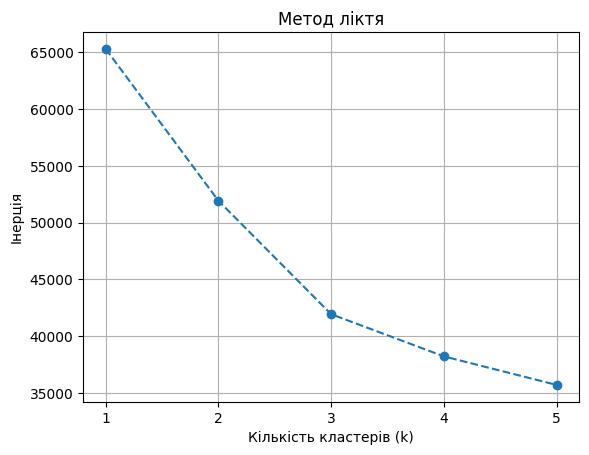

In [3]:
k_range = range(1, 6)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.xticks(k_range)
plt.grid()
plt.show()

Графік "заломлюється" на 3-му кластері, тому їх оптимальна кількість ~3. 

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled) 
labels_km = kmeans.labels_

Надати таблицю з цетрами кластерів та кількістю елементів.

In [5]:
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns) 
centers["number of elements"] = pd.Series(labels_km).value_counts().sort_index().values 
print("Центри кластерів:")
centers.head()

Центри кластерів:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,number of elements
0,6.955681,0.279111,0.335112,11.127897,0.052189,45.534871,170.035152,0.996941,3.159657,0.492857,9.552812,1778
1,8.467113,0.509209,0.299748,2.616719,0.088404,16.048387,51.261212,0.996871,3.284256,0.662360,10.282429,1271
2,6.775675,0.271577,0.317247,3.394373,0.040170,28.884176,117.576177,0.992114,3.206094,0.486949,11.181872,2888


Намалювати кластери різними кольорами на одній сітці та їх центри.

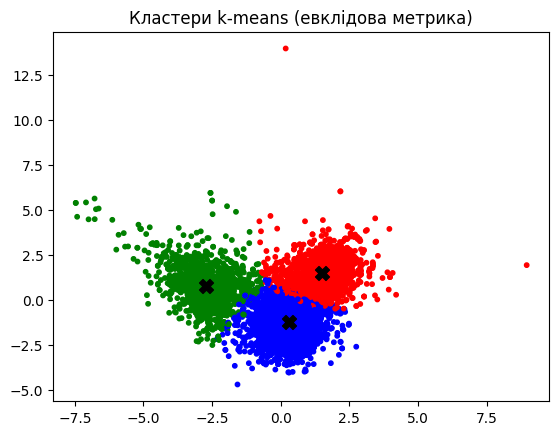

In [6]:
pca = PCA(2) 
X_pca = pca.fit_transform(X_scaled) 

colors = ["red", "green", "blue"]
plt.scatter(X_pca[:,0], X_pca[:,1], c=[colors[label] for label in labels_km], s=10)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], pca.transform(kmeans.cluster_centers_)[:,1], c="black", marker="X", s=100) 
plt.title("Кластери k-means (евклідова метрика)") 
plt.show()

Ієрархічний метод:

Намалювати дендограму.

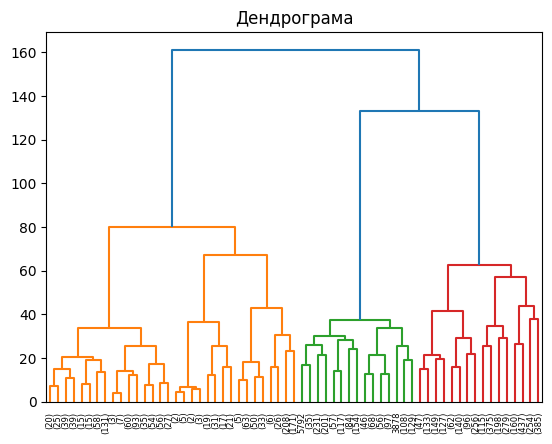

In [7]:
lm = linkage(X_scaled, method="ward", metric="euclidean") 
dendrogram(lm, truncate_mode="level", p=5) 
plt.title("Дендрограма") 
plt.show() 

На дендограмі видно чіткі розриви саме перед об’єднанням трьох груп у дві, тому як і в методі ліктя, оптимальною кількістю кластерів обираю 3. 

In [8]:
labels_hc = fcluster(lm, t=3, criterion="maxclust") 

Надати таблицю з кількістю елементів по кластерам.

In [9]:
counts_km = pd.Series(labels_km).value_counts().sort_index() 
counts_hc = pd.Series(labels_hc).value_counts().sort_index() 

comparison = pd.DataFrame({ "K-means (евклідова)": counts_km.values, "Ієрархічний (евклідова)": counts_hc.values }, index=[f"Кластер {i+1}" for i in range(len(counts_km))])
comparison.head()

,K-means (евклідова),Ієрархічний (евклідова)
Кластер 1,1778,1339
Кластер 2,1271,1385
Кластер 3,2888,3213
